In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [4]:
xlsx = pd.ExcelFile("UniversalBank.xlsx")
bank_df = pd.read_excel(xlsx, 'Data')


In [5]:
bank_df.columns = bank_df.columns.str.replace(' ','')
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1


In [6]:
bank_df.PersonalLoan.value_counts()


0    4520
1     480
Name: PersonalLoan, dtype: int64

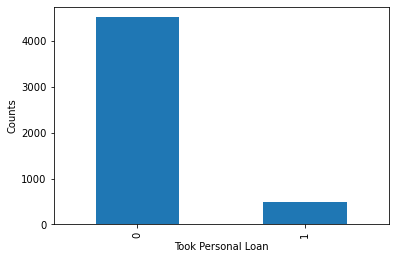

In [62]:
bank_df.PersonalLoan.value_counts().plot(kind='bar')
plt.xlabel('Took Personal Loan')
plt.ylabel("Counts")
plt.show()

In [8]:
bank_df.drop(columns =['ID','ZIPCode'], inplace = True)
#inplace - drop the column without copyting the entire dataframe

In [9]:
X = bank_df.drop(columns='PersonalLoan')

In [10]:
y = bank_df['PersonalLoan']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [12]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
fullClassTree.score(X_test, y_test)

0.953

In [14]:
y_predicted = fullClassTree.predict(X_test)
accuracy_score(y_test, y_predicted)

0.953

In [15]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


In [16]:
fullClassTree.tree_.max_depth

22

In [17]:
fullClassTree.tree_.node_count

265

In [18]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9530)

       Prediction
Actual    0    1
     0 1771   36
     1   58  135


In [19]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [20]:
export_graphviz(fullClassTree, out_file = 'fullClassTree.dot',
               feature_names = X_train.columns)

In [21]:
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ',[f'{acc:.3f}' for acc in scores] )

Accuracy scores of each fold:  ['0.948', '0.933', '0.943', '0.942', '0.947']


In [22]:
smallClassTree = DecisionTreeClassifier(max_depth=20, min_samples_split=20, min_impurity_decrease =0.01, random_state=1)

In [23]:
smallClassTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.01,
                       min_samples_split=20, random_state=1)

In [24]:
smallClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [25]:
smallClassTree.tree_.max_depth

2

In [26]:
smallClassTree.tree_.node_count

5

In [27]:
export_graphviz(smallClassTree, out_file = 'smallClassTree.dot',
               feature_names = X_train.columns)

In [28]:
classificationSummary(y_train, smallClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.9463)

       Prediction
Actual    0    1
     0 2698   15
     1  146  141


In [29]:
classificationSummary(y_test, smallClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9445)

       Prediction
Actual    0    1
     0 1799    8
     1  103   90


## Model Tuning

In [30]:
param_grid= {
    'max_depth':[10,20,30,40],
    'min_samples_split':[20, 40, 60, 80, 100],
    'min_impurity_decrease':[0, 0.0005, 0.001, 0.0005, 0.01]
}

In [31]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
                         param_grid, cv=5, n_jobs=-1)
#n_jobs = -1, let it find out by itself

In [32]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.0005,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [33]:
print('Initial Score: ', gridSearch.best_score_)
print('Inital parameters: ', gridSearch.best_params_)

Initial Score:  0.9523333333333334
Inital parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [34]:
param_grid= {
    'max_depth':list(range(2,16)),
    'min_samples_split':list(range(10,30)),
    'min_impurity_decrease':[0, 0.0009, 0.001, 0.0011]
}

In [35]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
                         param_grid, cv=5, n_jobs=-1)

In [36]:
gridSearch.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_impurity_decrease': [0, 0.0009, 0.001, 0.0011],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24, 25,
                                               26, 27, 28, 29]})

In [37]:
print('Improved Score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved Score:  0.9553333333333333
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 12}


In [38]:
bestClassTree = gridSearch.best_estimator_

## Adding Weights

In [51]:
from sklearn.utils.class_weight import compute_sample_weight

In [52]:
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

In [53]:
param_grid= {
    'max_depth':list(range(2,16)),
    'min_samples_split':list(range(10,30)),
    'min_impurity_decrease':[0, 0.0009, 0.001, 0.0011]
}

In [54]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),
                         param_grid, cv=5, n_jobs=-1)

In [55]:
gridSearch.fit(X_train, y_train, sample_weight = sample_weight)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_impurity_decrease': [0, 0.0009, 0.001, 0.0011],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21, 22, 23, 24, 25,
                                               26, 27, 28, 29]})

In [56]:
print('Improved Reweighted Score: ', gridSearch.best_score_)
print('Improved Reweighted parameters: ', gridSearch.best_params_)

Improved Reweighted Score:  0.9176666666666666
Improved Reweighted parameters:  {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_split': 10}


In [57]:
bestClassTree = gridSearch.best_estimator_

In [58]:
classificationSummary(y_train, bestClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.9487)

       Prediction
Actual    0    1
     0 2559  154
     1    0  287


In [59]:
classificationSummary(y_test, bestClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9155)

       Prediction
Actual    0    1
     0 1679  128
     1   41  152
